In [29]:
import numpy as np
from scipy.stats import norm
from scipy.stats import invgamma
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Problem 1


In [27]:
def gibbs(y, nu, tau2, alpha, beta, n_samples):
    N = float(len(y))
    y_sum = np.sum(y)
    
    # initialize mu and sigma2
    samples = np.zeros((n_samples, 2))
    samples[0,:] = y.mean(), np.var(y)
    for k in range(1,n_samples,2):
        Tau2 = 1./(1./tau2 + N/samples[k-1,1])
        Nu = Tau2*(float(nu)/tau2 + (1./samples[k-1,1])*y_sum)
        samples[k,:] = norm.rvs(Nu, scale=np.sqrt(Tau2)), samples[k-1,1]
        
        Alpha = alpha + N*.5
        Beta = beta + .5*np.sum((y - samples[k,0])**2)
        try:
            samples[k+1, :] = samples[k, 0], invgamma.rvs(Alpha, scale=Beta)
        except IndexError as err:
            #print(err)
            pass
    return samples

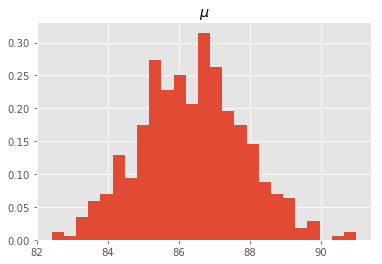

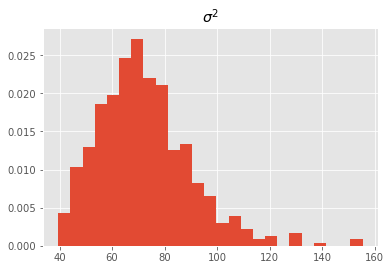

In [28]:
samples = gibbs(np.loadtxt('examscores.csv'), 80., 16., 3., 50., 1000)

plt.hist(samples[:,0], bins=25, normed=True)
plt.title(r'$\mu$')
plt.show()

plt.hist(samples[:,1], bins=25, normed=True)
plt.title(r'$\sigma^2$')
plt.show()

It didn't take very long to converge.

## Problem 2

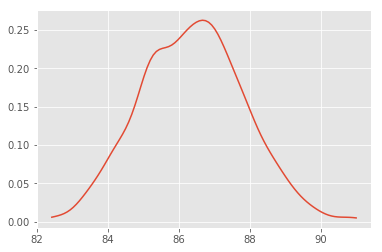

In [30]:
mu_kernel = gaussian_kde(samples[:,0])
x = np.linspace(samples[:,0].min(), samples[:,0].max(), 100)
plt.plot(x, mu_kernel(x))
plt.show()

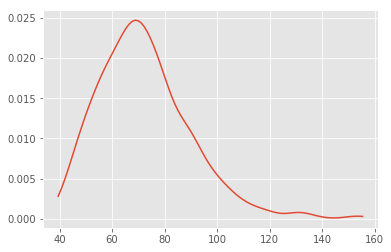

In [31]:
sigma2_kernel = gaussian_kde(samples[:,1])
x = np.linspace(samples[:,1].min(), samples[:,1].max(), 100)
plt.plot(x, sigma2_kernel(x))
plt.show()